In [1]:
import pandas as pd
import glob
from scipy.stats import ttest_ind
import os

In [191]:
resultDir = 'results'
problem = 'facilities' # choices=['setcover', 'cauctions', 'facilities', 'indset']
sampling_Strategies = ['uniform5','depthK','depthK2'] # choices: uniform5, depthK, depthK2, depthK3
sampling_seed = 0

In [192]:
sampleTimes_allStrategies = pd.DataFrame()
for sampling_Strategy in sampling_Strategies:
    problem_folders = {
        'setcover': f'setcover/500r_1000c_0.05d({sampling_Strategy})/{sampling_seed}',
        'cauctions': f'cauctions/100_500({sampling_Strategy})/{sampling_seed}',
        'facilities': f'facilities/100_100_5({sampling_Strategy})/{sampling_seed}',
        'indset': f'indset/500_4({sampling_Strategy})/{sampling_seed}',
    }
    problem_folder = problem_folders[problem]
    depthTablePath = f'data/samples/{problem_folder}/depthTable(trainSol).csv'
    depthTable = pd.read_csv(depthTablePath, index_col=0)
    sampleTimes_allStrategies[f'{sampling_Strategy}'] = depthTable['sampleTimes']

In [193]:
sampleTimes_allStrategies

,uniform5,depthK,depthK2
0,5.0,69.0,8
1,17.0,121.0,15
2,21.0,166.0,12
3,46.0,161.0,27
4,58.0,136.0,31
5,65.0,95.0,34
6,90.0,87.0,40
7,91.0,77.0,41
8,94.0,69.0,49
9,101.0,59.0,44


In [194]:
bin_size = 5
binned = sampleTimes_allStrategies.groupby(sampleTimes_allStrategies.index // bin_size).sum()
binned = binned / binned.sum()
binned['GroupName'] = [f"[{i*bin_size},{(i+1)*bin_size-1}]" for i in binned.index]
binned

,uniform5,depthK,depthK2,GroupName
0,0.121488,0.524920,0.095385,"[0,4]"
1,0.364463,0.311093,0.213333,"[5,9]"
2,0.265289,0.063505,0.221538,"[10,14]"
3,0.109091,0.040997,0.131282,"[15,19]"
4,0.056198,0.020900,0.088205,"[20,24]"
5,0.027273,0.013666,0.070769,"[25,29]"
6,0.028099,0.004823,0.055385,"[30,34]"
7,0.015702,0.010450,0.041026,"[35,39]"
8,0.009091,0.005627,0.035897,"[40,44]"
9,0.002479,0.001608,0.026667,"[45,49]"


[Text(0, 0, '[55,59]'),
 Text(0, 1, '[50,54]'),
 Text(0, 2, '[45,49]'),
 Text(0, 3, '[40,44]'),
 Text(0, 4, '[35,39]'),
 Text(0, 5, '[30,34]'),
 Text(0, 6, '[25,29]'),
 Text(0, 7, '[20,24]'),
 Text(0, 8, '[15,19]'),
 Text(0, 9, '[10,14]'),
 Text(0, 10, '[5,9]'),
 Text(0, 11, '[0,4]')]

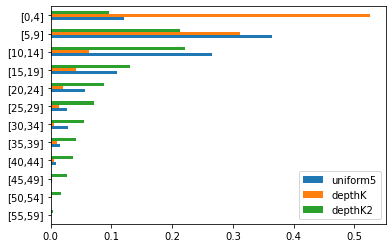

In [195]:
inv_bins = binned.sort_index(ascending=False)
axe = inv_bins.plot.barh()
axe.set_yticklabels(inv_bins['GroupName'])